In [1]:
# Kullanılacak Modüller
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [2]:
# Kullanılacak Data 

oecd_bli_2017 = pd.read_csv("oecd_bli_2017.csv", thousands=',')
oecd_bli_2017 = oecd_bli_2017[oecd_bli_2017["INEQUALITY"] == "TOT"]
oecd_bli_2017 = oecd_bli_2017.pivot(index="Country", columns="Indicator", values="Value")


gdp_per_capita2017 = pd.read_excel("gdp_per_capita_2017.xlsx", thousands=',', delimiter='\t',encoding='latin1', na_values="n/a")
gdp_per_capita2017.rename(columns={2017:"GDP per capita"}, inplace=True)
gdp_per_capita2017.set_index("Country", inplace=True)


country_stats_2017 = pd.merge(left=oecd_bli_2017, right=gdp_per_capita2017, left_index=True, right_index=True)
country_stats_2017.sort_values(by="GDP per capita", inplace=True)
country_stats_2017

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net financial wealth,Housing expenditure,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
South Africa,22.0,37.0,43.0,18.68,43.0,36.1,10.0,10872.0,17042.0,18.0,...,14.73,73.0,69.0,15.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",5588.959,2016.0
Mexico,16.0,4.2,37.0,29.48,61.0,45.9,17.9,13891.0,4750.0,21.0,...,12.74,63.0,67.0,14.8,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",7993.174,2015.0
Turkey,20.0,6.5,39.0,33.77,51.0,60.6,1.7,17067.0,4429.0,20.0,...,12.59,85.0,63.0,17.9,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9826.248,2016.0
Brazil,10.0,6.7,49.0,7.15,64.0,37.3,27.6,12227.0,7102.0,20.0,...,14.45,79.0,72.0,15.9,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",10308.811,2016.0
Russia,15.0,13.8,95.0,0.16,70.0,52.2,11.3,16657.0,2260.0,19.0,...,14.90,65.0,54.0,16.1,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",10885.484,2016.0
Poland,22.0,2.7,91.0,6.68,65.0,66.3,0.8,18906.0,14997.0,23.0,...,14.42,55.0,80.0,17.7,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12721.758,2015.0
Hungary,19.0,4.3,83.0,3.05,67.0,50.7,1.2,16821.0,23289.0,18.0,...,15.06,62.0,76.0,16.6,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12767.023,2015.0
Chile,16.0,9.4,65.0,10.06,62.0,51.1,4.5,16588.0,21409.0,18.0,...,14.90,49.0,69.0,17.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",13662.906,2015.0
Latvia,11.0,12.9,89.0,2.09,69.0,60.7,6.6,15269.0,17105.0,23.0,...,13.83,59.0,77.0,17.9,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14187.602,2016.0


In [3]:
# Türkiyenin kişi başına düşen Gayrisafi yurt içi hasılası (GSYİH) ve Yaşam Memnuniyeti
country_stats_2017[["GDP per capita", "Life satisfaction"]].loc["Turkey"]

Indicator
GDP per capita       9826.248
Life satisfaction       5.500
Name: Turkey, dtype: float64

In [4]:
# Doğrusal Regresyon

from sklearn import linear_model
lin1 = linear_model.LinearRegression()
Xsample = np.c_[country_stats_2017["GDP per capita"]]
ysample = np.c_[country_stats_2017["Life satisfaction"]]
lin1.fit(Xsample, ysample)
t0, t1 = lin1.intercept_[0], lin1.coef_[0][0]
t0, t1

/Users/euclid/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


(5.660176251069037, 2.453296652801671e-05)

In [5]:
# Turkiye için Tahmini Yaşam Memnuniyeti

turkey_gdp_per_capita_2017 = gdp_per_capita2017.loc["Turkey"]["GDP per capita"]
turkey_predicted_life_satisfaction_2017 = lin1.predict(turkey_gdp_per_capita_2017)[0][0]
turkey_predicted_life_satisfaction_2017

5.901243264349029

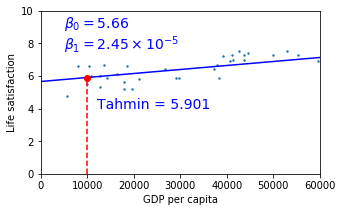

In [6]:
# Grafiğin Üretilmesi

country_stats_2017.plot(kind="scatter", x="GDP per capita", y="Life satisfaction", figsize=(5,3), s=2)
X=np.linspace(0,60000,1000)
plt.plot(X, t0 + t1*X, "b")
plt.axis([0, 60000, 0, 10])
plt.text(5000, 9.0, r"$\beta_0 = 5.66$", fontsize=14, color="b")
plt.text(5000, 7.6, r"$\beta_1 = 2.45 \times 10^{-5}$", fontsize=14, color="b")
plt.plot([turkey_gdp_per_capita_2017, turkey_gdp_per_capita_2017], [0, turkey_predicted_life_satisfaction_2017], "r--")
plt.text(12000, 4.0, r"Tahmin = 5.901", fontsize=14, color="b")
plt.plot(turkey_gdp_per_capita_2017, turkey_predicted_life_satisfaction_2017, "ro")
plt.show()